In [3]:
import pandas as pd

# Load local housing.csv file
df = pd.read_csv('housing.csv')

# Show the first few rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Framing the Problem - Describe the goal of this report (0.5 points).

In this lab, our focus is on building and analyzing univariate linear regression models for the prediction of housing prices in California. A perspective will be taken on the ways particular demographic factors- median income, population, and number of households- influence the price of a valuation when considered in isolation. This helps in finding the factor with the maximum impact on housing prices. The results from such studies can help product teams and policy makers as they make data-related decisions on housing and community planning.

### 2. Getting the Data - hyperlink to the source (0.25 point) and load into Pandas (0.25 point).

### Data source - https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [5]:
import pandas as pd
df = pd.read_csv('housing.csv')
df = pd.read_csv(url)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 3. Exploratory Data Analysis (EDA) (2 points):

1. Explore statistics (e.g., using Pandas `describe` function) 

In [6]:
if df is not None:
    print("Descriptive statistics for the entire dataset:")
    print(df.describe())

    # Focus on the variables of interest for this lab
    variables_of_interest = ['median_house_value', 'median_income', 'population', 'households']
    print("\nDescriptive statistics for key variables:")
    if all(col in df.columns for col in variables_of_interest):
        print(df[variables_of_interest].describe())
    else:
        print(f"One or more key variables not found. Available columns: {df.columns}")
else:
    print("DataFrame not loaded. Cannot perform EDA.")


Descriptive statistics for the entire dataset:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      

2. Create three Seaborn scatter plots of median house value vs. median income, population, and number of households. There should be one scatter plot for each independent variable. Add a title to each graph (using Seaborn). Provide a textual interpretation of the graphs and insights specific to the linear regression you are going to conduct next. (1 point).

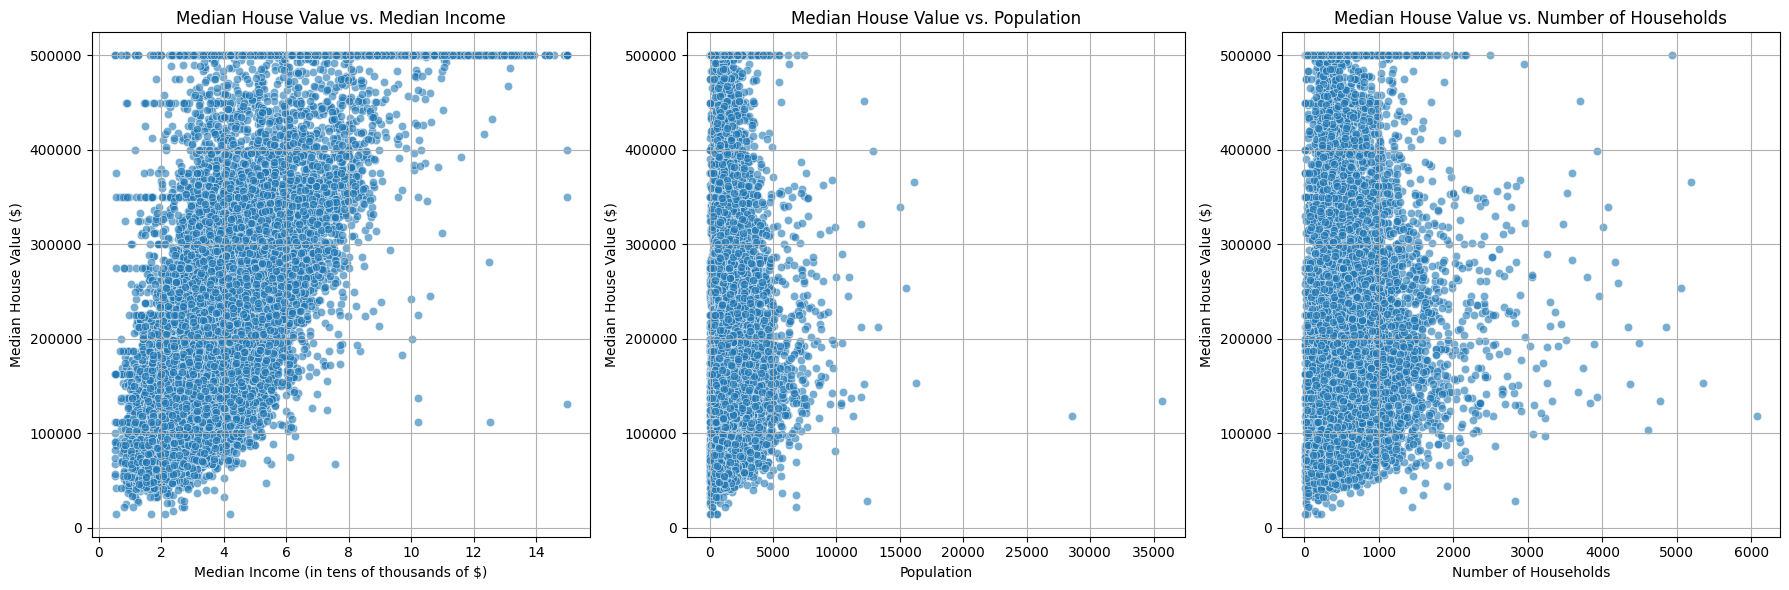

In [ ]:
import matplotlib.pyplot as plt

if df is not None and all(col in df.columns for col in variables_of_interest):
    plt.figure(figsize=(18, 6)) # Adjust figure size for better layout

    #  Median House Value vs. Median Income
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.6)
    plt.title('Median House Value vs. Median Income')
    plt.xlabel('Median Income (in tens of thousands of $)')
    plt.ylabel('Median House Value ($)')
    plt.grid(True)

    #  Median House Value vs. Population
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.6)
    plt.title('Median House Value vs. Population')
    plt.xlabel('Population')
    plt.ylabel('Median House Value ($)')
    plt.grid(True)

    # Median House Value vs. Number of Households
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.6)
    plt.title('Median House Value vs. Number of Households')
    plt.xlabel('Number of Households')
    plt.ylabel('Median House Value ($)')
    plt.grid(True)

    plt.tight_layout() 
    plt.show()
else:
    print("DataFrame not loaded or key variables missing. Cannot create scatter plots.")

We see here again that the scatterplot shows a strong potential in linear regression for median income to predict the median house value. That relationship, however, shows an increase in variance as the incomes go higher (which is obviously a heteroscedasticity issue to tackle). Meanwhile, population and number of households show greater linear relations but less well-defined with the median house value. These two are heavily skewed: most data points are concentrated on the lower end of the scale, so they might be poor linear predictors or else might need to be transformed to be useful in a linear regression framework.

### 3. Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range, and additional characteristics that you notice. This should be concise and relevant (1 point).

Based on the graphs showing, median house value, median income, population and number of household.

Median house value- This is mostly the dependent variable and also representing the money worth of houses in specific areas, it is measured in dollars and it is ranging from $0 to $500000. 

Median Income- It is an independent variable, showing the typical income of the households. It is given in tens of thousands of dollars. It is ranging from $0 to $150000. It is appeared to be somewhat skewed to the right and with a great higher density at lower to middle income.

Population- It is an independent vartiable showing the number of people are in a area. It is from 0 to over 35,000. This value is highly right side skewed and majority of areas have small populations.

Number of households- It is an independent variable showing the count of household units in the area, showing from o to 6000. Same like population, it is highly right skewed, with the data concentrated at low household counts.

### 4. Run three linear regressions (fitting) between (1.5 points):
Median house value vs. median income
Median house value vs. population
Median house value vs. number of households.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

if df is not None and all(col in df.columns for col in variables_of_interest):
    # Prepare the dependent variable
    y = df['median_house_value']

    # 1: Median House Value vs. Median Income 
    X1 = df[['median_income']] 
    model1 = LinearRegression()
    model1.fit(X1, y)
    y_pred1 = model1.predict(X1) 

    # Store results for table and plotting
    intercept1 = model1.intercept_
    slope1 = model1.coef_[0]
    mse1 = mean_squared_error(y, y_pred1)
    mae1 = mean_absolute_error(y, y_pred1)

    print(f"--- Model 1: Median Income ---")
    print(f"Intercept (b0): {intercept1:.2f}")
    print(f"Slope (b1): {slope1:.2f}")
    print(f"MSE: {mse1:.2f}")
    print(f"MAE: {mae1:.2f}\n")

    #  2: Median House Value vs. Population 
    X2 = df[['population']]
    model2 = LinearRegression()
    model2.fit(X2, y)
    y_pred2 = model2.predict(X2)

    intercept2 = model2.intercept_
    slope2 = model2.coef_[0]
    mse2 = mean_squared_error(y, y_pred2)
    mae2 = mean_absolute_error(y, y_pred2)

    print(f"--- Model 2: Population ---")
    print(f"Intercept (b0): {intercept2:.2f}")
    print(f"Slope (b1): {slope2:.2f}")
    print(f"MSE: {mse2:.2f}")
    print(f"MAE: {mae2:.2f}\n")

    #  3: Median House Value vs. Number of Households 
    X3 = df[['households']]
    model3 = LinearRegression()
    model3.fit(X3, y)
    y_pred3 = model3.predict(X3)

    intercept3 = model3.intercept_
    slope3 = model3.coef_[0]
    mse3 = mean_squared_error(y, y_pred3)
    mae3 = mean_absolute_error(y, y_pred3)

    print(f"--- Model 3: Households ---")
    print(f"Intercept (b0): {intercept3:.2f}")
    print(f"Slope (b1): {slope3:.2f}")
    print(f"MSE: {mse3:.2f}")
    print(f"MAE: {mae3:.2f}\n")

else:
    print("DataFrame not loaded or key variables missing. Cannot fit models.")
    
    intercept1, slope1, mse1, mae1 = [np.nan]*4
    intercept2, slope2, mse2, mae2 = [np.nan]*4
    intercept3, slope3, mse3, mae3 = [np.nan]*4

--- Model 1: Median Income ---
Intercept (b0): 45085.58
Slope (b1): 41793.85
MSE: 7011311502.93
MAE: 62625.93

--- Model 2: Population ---
Intercept (b0): 210436.26
Slope (b1): -2.51
MSE: 13307412412.39
MAE: 91153.82

--- Model 3: Households ---
Intercept (b0): 196928.58
Slope (b1): 19.87
MSE: 13257776904.73
MAE: 90802.74



### 5. In a single table for all three linear regressions, provide per regression model (1.5 points):
intercept and slope (0.5 points)
Mean Squared Error (0.5 points)
Mean Absolute Error (0.5 points)

This table summarizes the intercept, slope, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for each of the three linear regression models.

| Independent Variable | Intercept (b0)         | Slope (b1)        | Mean Squared Error (MSE) | Mean Absolute Error (MAE) |
|----------------------|------------------------|-------------------|--------------------------|---------------------------|
| Median Income        | [45085.58: `intercept1`] | [41793.85: `slope1`] | [7011311502.93: `mse1`]  | [62625.93: `mae1`]   |
| Population           | [210436.26: `intercept2`] | [-2.51: `slope2`] | [13307412412.39: `mse2`]  | [91153.82: `mae2`]   |
| Number of Households | [196928.58: `intercept3`] | [19.87: `slope3`] | [13257776904.73: `mse3`]  | [90802.74: `mae3`]   |

In [14]:
if 'slope1' in locals(): 
    summary_data = {
        'Independent Variable': ['Median Income', 'Population', 'Number of Households'],
        'Intercept (b0)': [f"{intercept1:.2f}", f"{intercept2:.2f}", f"{intercept3:.2f}"],
        'Slope (b1)': [f"{slope1:.2f}", f"{slope2:.2f}", f"{slope3:.2f}"],
        'Mean Squared Error (MSE)': [f"{mse1:.2f}", f"{mse2:.2f}", f"{mse3:.2f}"],
        'Mean Absolute Error (MAE)': [f"{mae1:.2f}", f"{mae2:.2f}", f"{mae3:.2f}"]
    }
    summary_df = pd.DataFrame(summary_data)
    print("Model Summary Table (for copy-pasting into Markdown):")
    print(summary_df.to_string(index=False)) 
else:
    print("Model results not available to create summary table.")


Model Summary Table (for copy-pasting into Markdown):
Independent Variable Intercept (b0) Slope (b1) Mean Squared Error (MSE) Mean Absolute Error (MAE)
       Median Income       45085.58   41793.85            7011311502.93                  62625.93
          Population      210436.26      -2.51           13307412412.39                  91153.82
Number of Households      196928.58      19.87           13257776904.73                  90802.74


### 6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE, and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn, or Plotly)  (2 points)

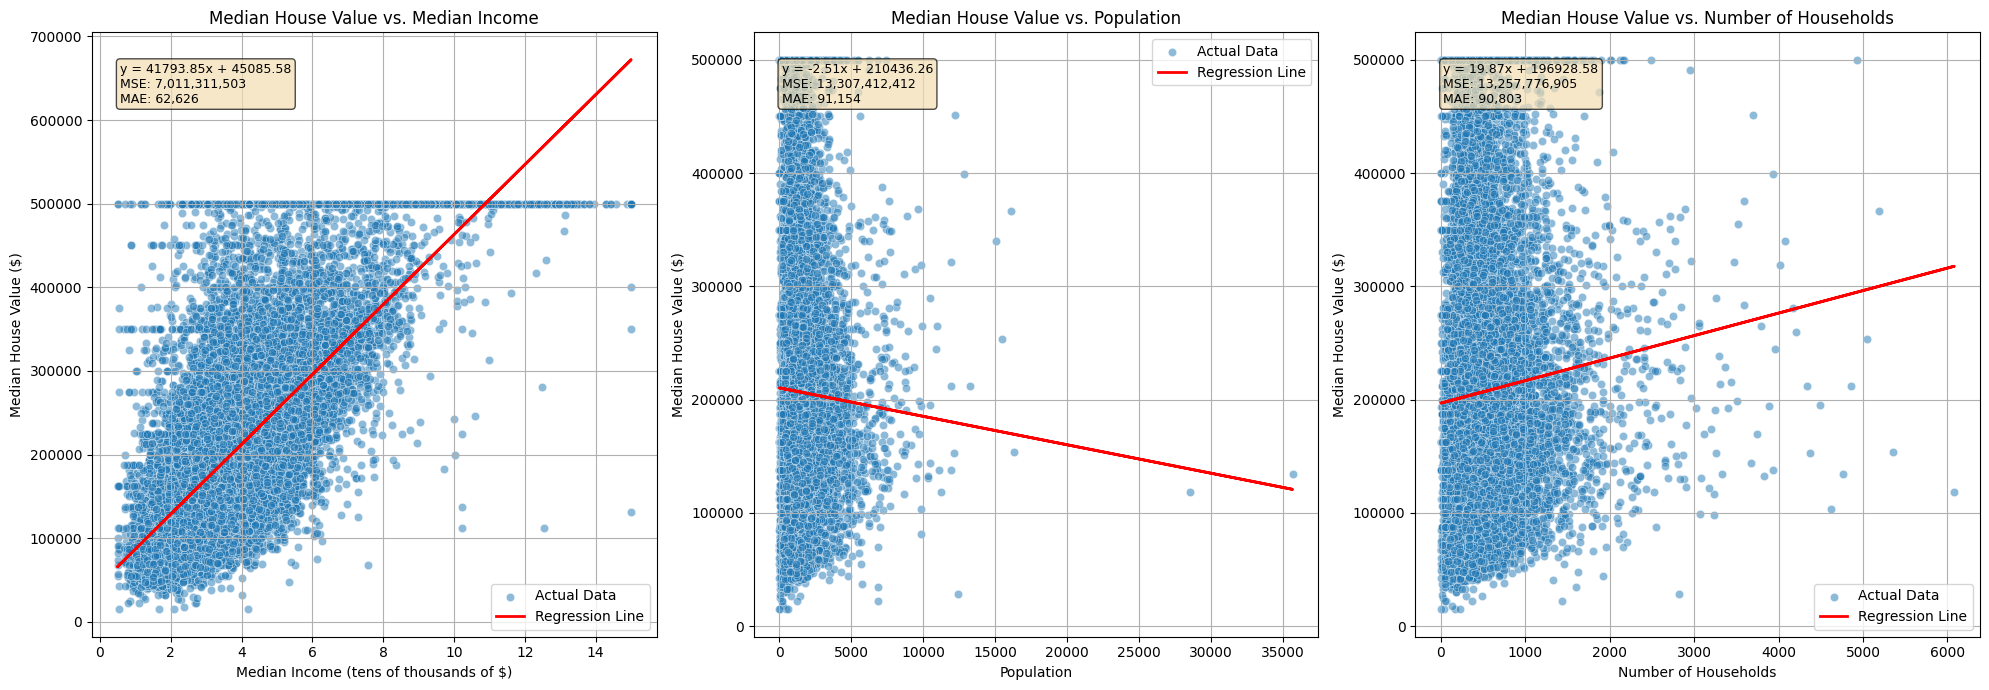

In [15]:
if df is not None and 'model1' in locals(): 
    plt.figure(figsize=(20, 7))

    #  Median Income
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5, label='Actual Data')
    plt.plot(X1, y_pred1, color='red', linewidth=2, label='Regression Line') 
    plt.title('Median House Value vs. Median Income')
    plt.xlabel('Median Income (tens of thousands of $)')
    plt.ylabel('Median House Value ($)')
    plt.legend()
    plt.grid(True)
    stats_text1 = (f"y = {slope1:.2f}x + {intercept1:.2f}\n"
                   f"MSE: {mse1:,.0f}\n" 
                   f"MAE: {mae1:,.0f}")
  
    plt.text(0.05, 0.95, stats_text1, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.7))

    #  Population
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.5, label='Actual Data')
    plt.plot(X2, y_pred2, color='red', linewidth=2, label='Regression Line')
    plt.title('Median House Value vs. Population')
    plt.xlabel('Population')
    plt.ylabel('Median House Value ($)')
  
    plt.legend()
    plt.grid(True)
    stats_text2 = (f"y = {slope2:.2f}x + {intercept2:.2f}\n"
                   f"MSE: {mse2:,.0f}\n"
                   f"MAE: {mae2:,.0f}")
    plt.text(0.05, 0.95, stats_text2, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.7))

    #  Number of Households
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.5, label='Actual Data')
    plt.plot(X3, y_pred3, color='red', linewidth=2, label='Regression Line')
    plt.title('Median House Value vs. Number of Households')
    plt.xlabel('Number of Households')
    plt.ylabel('Median House Value ($)')
  
    plt.legend()
    plt.grid(True)
    stats_text3 = (f"y = {slope3:.2f}x + {intercept3:.2f}\n"
                   f"MSE: {mse3:,.0f}\n"
                   f"MAE: {mae3:,.0f}")
    plt.text(0.05, 0.95, stats_text3, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.7))

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame not loaded or models not fitted. Cannot create result plots.")

### 7. Summary: Provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed (1.25 points)


Predicting Median House Value with Median Income performs best out of the three, as its MSE and MAE are both significantly lower than the Population and Number of Households models.



The regression line of the Median Income model clearly goes up (b1​=41793.85), compared to the nearly flat line of Population (b1​=−2.51) and the slightly tilted line of Number of Households (b1​=19.87). There is little relationship between house values and the lines from these two models, partly because there are too many low and high predictor values.



Importantly, the significant data cap for a typical $500,000 house makes it harder for any model to be accurate with houses worth more. The Median Income model has errors that change in variance depending on a person’s income. Population and Number of Households have such small and weak slopes that they stand out as poor candidates for direct linear relations.



Overall, Median Income provides the best fitting results, though its ability to predict from data is still weak. The Population and Households models do not perform as well as the Housing and Labor Force models. Improved results could be achieved by altering data or using more advanced modeling methods in the future.

In [ ]:
import pandas as pd

# Load local housing.csv file
df = pd.read_csv('housing.csv')

# Show the first few rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Framing the Problem - Describe the goal of this report (0.5 points).

In this lab, our focus is on building and analyzing univariate linear regression models for the prediction of housing prices in California. A perspective will be taken on the ways particular demographic factors- median income, population, and number of households- influence the price of a valuation when considered in isolation. This helps in finding the factor with the maximum impact on housing prices. The results from such studies can help product teams and policy makers as they make data-related decisions on housing and community planning.

### 2. Getting the Data - hyperlink to the source (0.25 point) and load into Pandas (0.25 point).

### Data source - https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
import pandas as pd
df = pd.read_csv('housing.csv')
df = pd.read_csv(url)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 3. Exploratory Data Analysis (EDA) (2 points):

1. Explore statistics (e.g., using Pandas `describe` function) 

In [ ]:
if df is not None:
    print("Descriptive statistics for the entire dataset:")
    print(df.describe())

    # Focus on the variables of interest for this lab
    variables_of_interest = ['median_house_value', 'median_income', 'population', 'households']
    print("\nDescriptive statistics for key variables:")
    if all(col in df.columns for col in variables_of_interest):
        print(df[variables_of_interest].describe())
    else:
        print(f"One or more key variables not found. Available columns: {df.columns}")
else:
    print("DataFrame not loaded. Cannot perform EDA.")


Descriptive statistics for the entire dataset:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      

2. Create three Seaborn scatter plots of median house value vs. median income, population, and number of households. There should be one scatter plot for each independent variable. Add a title to each graph (using Seaborn). Provide a textual interpretation of the graphs and insights specific to the linear regression you are going to conduct next. (1 point).

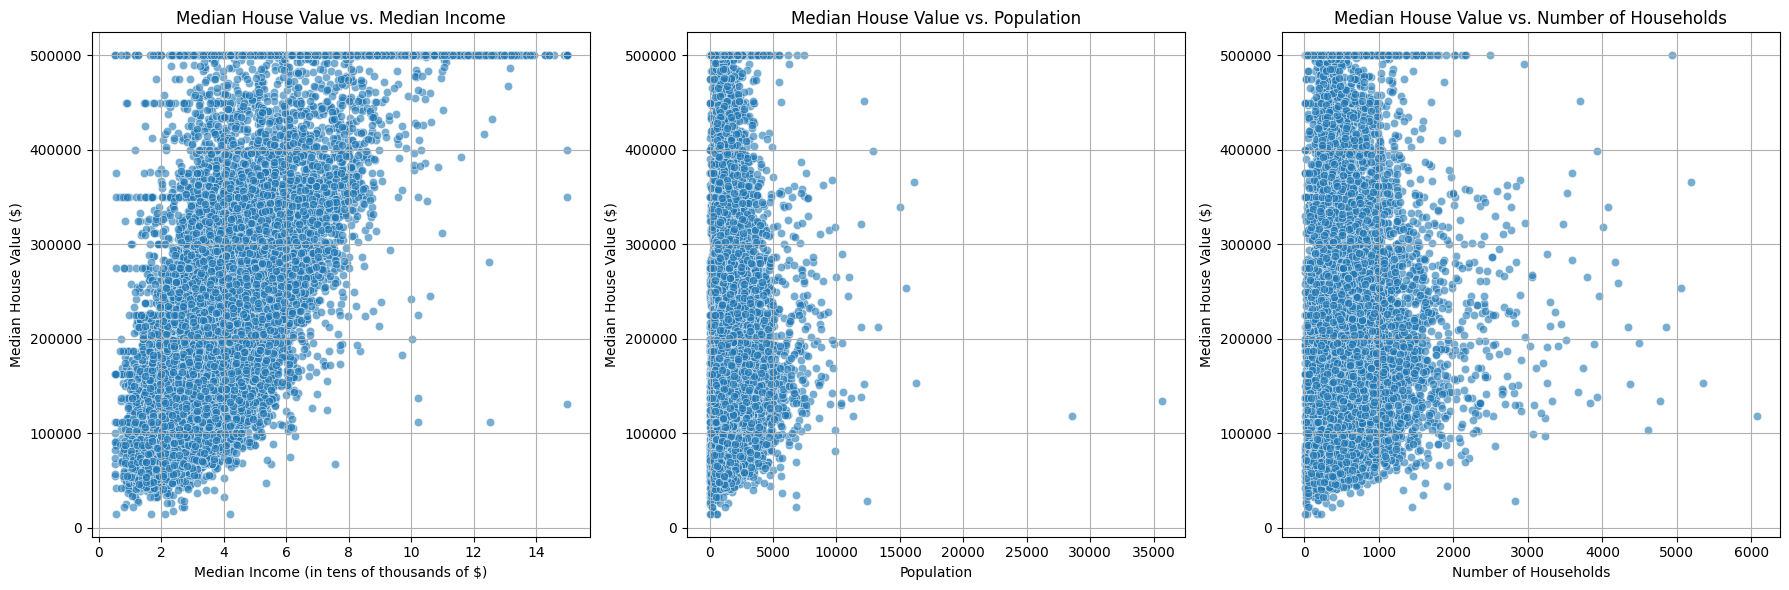

In [ ]:
import matplotlib.pyplot as plt

if df is not None and all(col in df.columns for col in variables_of_interest):
    plt.figure(figsize=(18, 6)) # Adjust figure size for better layout

    #  Median House Value vs. Median Income
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.6)
    plt.title('Median House Value vs. Median Income')
    plt.xlabel('Median Income (in tens of thousands of $)')
    plt.ylabel('Median House Value ($)')
    plt.grid(True)

    #  Median House Value vs. Population
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.6)
    plt.title('Median House Value vs. Population')
    plt.xlabel('Population')
    plt.ylabel('Median House Value ($)')
    plt.grid(True)

    # Median House Value vs. Number of Households
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.6)
    plt.title('Median House Value vs. Number of Households')
    plt.xlabel('Number of Households')
    plt.ylabel('Median House Value ($)')
    plt.grid(True)

    plt.tight_layout() 
    plt.show()
else:
    print("DataFrame not loaded or key variables missing. Cannot create scatter plots.")

We see here again that the scatterplot shows a strong potential in linear regression for median income to predict the median house value. That relationship, however, shows an increase in variance as the incomes go higher (which is obviously a heteroscedasticity issue to tackle). Meanwhile, population and number of households show greater linear relations but less well-defined with the median house value. These two are heavily skewed: most data points are concentrated on the lower end of the scale, so they might be poor linear predictors or else might need to be transformed to be useful in a linear regression framework.

### 3. Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range, and additional characteristics that you notice. This should be concise and relevant (1 point).

Based on the graphs showing, median house value, median income, population and number of household.

Median house value- This is mostly the dependent variable and also representing the money worth of houses in specific areas, it is measured in dollars and it is ranging from $0 to $500000. 

Median Income- It is an independent variable, showing the typical income of the households. It is given in tens of thousands of dollars. It is ranging from $0 to $150000. It is appeared to be somewhat skewed to the right and with a great higher density at lower to middle income.

Population- It is an independent vartiable showing the number of people are in a area. It is from 0 to over 35,000. This value is highly right side skewed and majority of areas have small populations.

Number of households- It is an independent variable showing the count of household units in the area, showing from o to 6000. Same like population, it is highly right skewed, with the data concentrated at low household counts.

### 4. Run three linear regressions (fitting) between (1.5 points):
Median house value vs. median income
Median house value vs. population
Median house value vs. number of households.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

if df is not None and all(col in df.columns for col in variables_of_interest):
    # Prepare the dependent variable
    y = df['median_house_value']

    # 1: Median House Value vs. Median Income 
    X1 = df[['median_income']] 
    model1 = LinearRegression()
    model1.fit(X1, y)
    y_pred1 = model1.predict(X1) 

    # Store results for table and plotting
    intercept1 = model1.intercept_
    slope1 = model1.coef_[0]
    mse1 = mean_squared_error(y, y_pred1)
    mae1 = mean_absolute_error(y, y_pred1)

    print(f"--- Model 1: Median Income ---")
    print(f"Intercept (b0): {intercept1:.2f}")
    print(f"Slope (b1): {slope1:.2f}")
    print(f"MSE: {mse1:.2f}")
    print(f"MAE: {mae1:.2f}\n")

    #  2: Median House Value vs. Population 
    X2 = df[['population']]
    model2 = LinearRegression()
    model2.fit(X2, y)
    y_pred2 = model2.predict(X2)

    intercept2 = model2.intercept_
    slope2 = model2.coef_[0]
    mse2 = mean_squared_error(y, y_pred2)
    mae2 = mean_absolute_error(y, y_pred2)

    print(f"--- Model 2: Population ---")
    print(f"Intercept (b0): {intercept2:.2f}")
    print(f"Slope (b1): {slope2:.2f}")
    print(f"MSE: {mse2:.2f}")
    print(f"MAE: {mae2:.2f}\n")

    #  3: Median House Value vs. Number of Households 
    X3 = df[['households']]
    model3 = LinearRegression()
    model3.fit(X3, y)
    y_pred3 = model3.predict(X3)

    intercept3 = model3.intercept_
    slope3 = model3.coef_[0]
    mse3 = mean_squared_error(y, y_pred3)
    mae3 = mean_absolute_error(y, y_pred3)

    print(f"--- Model 3: Households ---")
    print(f"Intercept (b0): {intercept3:.2f}")
    print(f"Slope (b1): {slope3:.2f}")
    print(f"MSE: {mse3:.2f}")
    print(f"MAE: {mae3:.2f}\n")

else:
    print("DataFrame not loaded or key variables missing. Cannot fit models.")
    
    intercept1, slope1, mse1, mae1 = [np.nan]*4
    intercept2, slope2, mse2, mae2 = [np.nan]*4
    intercept3, slope3, mse3, mae3 = [np.nan]*4

--- Model 1: Median Income ---
Intercept (b0): 45085.58
Slope (b1): 41793.85
MSE: 7011311502.93
MAE: 62625.93

--- Model 2: Population ---
Intercept (b0): 210436.26
Slope (b1): -2.51
MSE: 13307412412.39
MAE: 91153.82

--- Model 3: Households ---
Intercept (b0): 196928.58
Slope (b1): 19.87
MSE: 13257776904.73
MAE: 90802.74



### 5. In a single table for all three linear regressions, provide per regression model (1.5 points):
intercept and slope (0.5 points)
Mean Squared Error (0.5 points)
Mean Absolute Error (0.5 points)

This table summarizes the intercept, slope, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for each of the three linear regression models.

| Independent Variable | Intercept (b0)         | Slope (b1)        | Mean Squared Error (MSE) | Mean Absolute Error (MAE) |
|----------------------|------------------------|-------------------|--------------------------|---------------------------|
| Median Income        | [45085.58: `intercept1`] | [41793.85: `slope1`] | [7011311502.93: `mse1`]  | [62625.93: `mae1`]   |
| Population           | [210436.26: `intercept2`] | [-2.51: `slope2`] | [13307412412.39: `mse2`]  | [91153.82: `mae2`]   |
| Number of Households | [196928.58: `intercept3`] | [19.87: `slope3`] | [13257776904.73: `mse3`]  | [90802.74: `mae3`]   |

In [ ]:
if 'slope1' in locals(): 
    summary_data = {
        'Independent Variable': ['Median Income', 'Population', 'Number of Households'],
        'Intercept (b0)': [f"{intercept1:.2f}", f"{intercept2:.2f}", f"{intercept3:.2f}"],
        'Slope (b1)': [f"{slope1:.2f}", f"{slope2:.2f}", f"{slope3:.2f}"],
        'Mean Squared Error (MSE)': [f"{mse1:.2f}", f"{mse2:.2f}", f"{mse3:.2f}"],
        'Mean Absolute Error (MAE)': [f"{mae1:.2f}", f"{mae2:.2f}", f"{mae3:.2f}"]
    }
    summary_df = pd.DataFrame(summary_data)
    print("Model Summary Table (for copy-pasting into Markdown):")
    print(summary_df.to_string(index=False)) 
else:
    print("Model results not available to create summary table.")


Model Summary Table (for copy-pasting into Markdown):
Independent Variable Intercept (b0) Slope (b1) Mean Squared Error (MSE) Mean Absolute Error (MAE)
       Median Income       45085.58   41793.85            7011311502.93                  62625.93
          Population      210436.26      -2.51           13307412412.39                  91153.82
Number of Households      196928.58      19.87           13257776904.73                  90802.74


### 6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE, and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn, or Plotly)  (2 points)

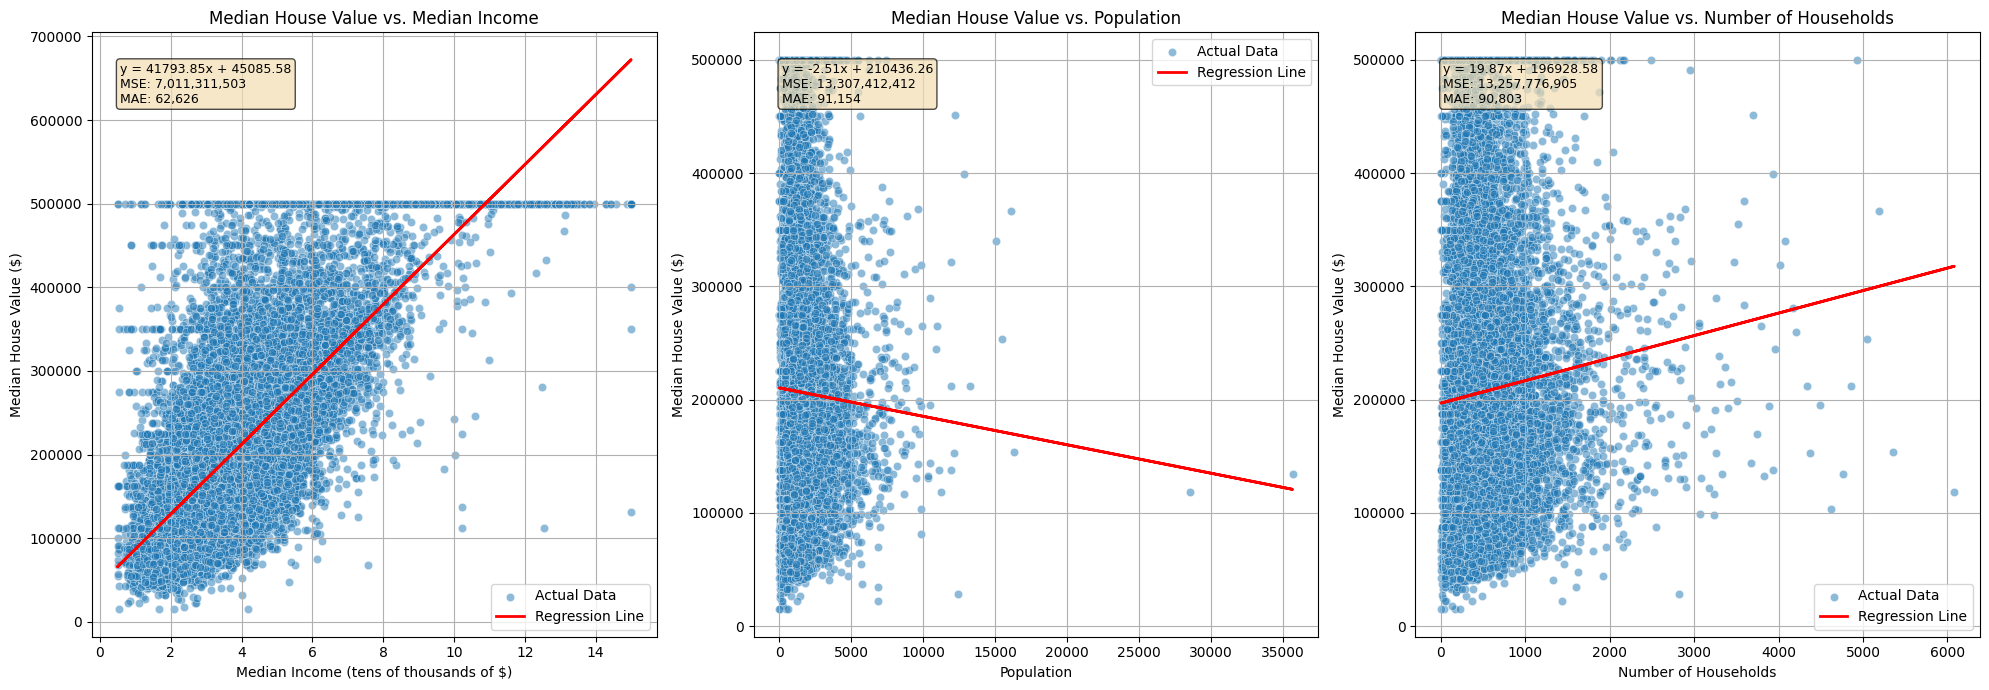

In [ ]:
if df is not None and 'model1' in locals(): 
    plt.figure(figsize=(20, 7))

    #  Median Income
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5, label='Actual Data')
    plt.plot(X1, y_pred1, color='red', linewidth=2, label='Regression Line') 
    plt.title('Median House Value vs. Median Income')
    plt.xlabel('Median Income (tens of thousands of $)')
    plt.ylabel('Median House Value ($)')
    plt.legend()
    plt.grid(True)
    stats_text1 = (f"y = {slope1:.2f}x + {intercept1:.2f}\n"
                   f"MSE: {mse1:,.0f}\n" 
                   f"MAE: {mae1:,.0f}")
  
    plt.text(0.05, 0.95, stats_text1, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.7))

    #  Population
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.5, label='Actual Data')
    plt.plot(X2, y_pred2, color='red', linewidth=2, label='Regression Line')
    plt.title('Median House Value vs. Population')
    plt.xlabel('Population')
    plt.ylabel('Median House Value ($)')
  
    plt.legend()
    plt.grid(True)
    stats_text2 = (f"y = {slope2:.2f}x + {intercept2:.2f}\n"
                   f"MSE: {mse2:,.0f}\n"
                   f"MAE: {mae2:,.0f}")
    plt.text(0.05, 0.95, stats_text2, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.7))

    #  Number of Households
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.5, label='Actual Data')
    plt.plot(X3, y_pred3, color='red', linewidth=2, label='Regression Line')
    plt.title('Median House Value vs. Number of Households')
    plt.xlabel('Number of Households')
    plt.ylabel('Median House Value ($)')
  
    plt.legend()
    plt.grid(True)
    stats_text3 = (f"y = {slope3:.2f}x + {intercept3:.2f}\n"
                   f"MSE: {mse3:,.0f}\n"
                   f"MAE: {mae3:,.0f}")
    plt.text(0.05, 0.95, stats_text3, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.7))

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame not loaded or models not fitted. Cannot create result plots.")

### 7. Summary: Provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed (1.25 points)


Predicting Median House Value with Median Income performs best out of the three, as its MSE and MAE are both significantly lower than the Population and Number of Households models.



The regression line of the Median Income model clearly goes up (b1​=41793.85), compared to the nearly flat line of Population (b1​=−2.51) and the slightly tilted line of Number of Households (b1​=19.87). There is little relationship between house values and the lines from these two models, partly because there are too many low and high predictor values.



Importantly, the significant data cap for a typical $500,000 house makes it harder for any model to be accurate with houses worth more. The Median Income model has errors that change in variance depending on a person’s income. Population and Number of Households have such small and weak slopes that they stand out as poor candidates for direct linear relations.



Overall, Median Income provides the best fitting results, though its ability to predict from data is still weak. The Population and Households models do not perform as well as the Housing and Labor Force models. Improved results could be achieved by altering data or using more advanced modeling methods in the future.